# Al Charge Radius Plot

Kurtis Bartlett

2017/3/3

Ipython notebook for generating plot of extracted and theoretically predicted <sup>27</sup>Al charge radii.

In [1]:
# Import the necessary packages and modules
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Keep matplotlib plot inline
%matplotlib inline

In [3]:
pp.style.use('seaborn-white')
sns.set_palette("muted")
plot_size = 12*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [4]:
# Theoretical Calculation
theory_cal = np.array([3.013]) #[fm]
theory_cal_err = np.array([0.000]) #[fm]

# Electron Scattering Data
e_scattering_data = np.array([3.06, 3.05, 3.035]) #[fm]
e_scattering_data_err = np.array([0.09, 0.05, 0.040]) #[fm]

# Muonic Atomic Data
muon_atom_data = np.array([3.063]) #[fm]
muon_atom_data_err = np.array([0.000]) #[fm]

In [5]:
# Calculate Error Weight Average
[ewa,sum_weights]=np.average(e_scattering_data, weights=1/(e_scattering_data_err*e_scattering_data_err),returned=True)
ewa_err=np.sqrt((1/sum_weights))
avg_text='Average: {0:.2f}+-{1:.2f}'.format(ewa, ewa_err)

In [6]:
# Vertical Axis Names
y_axis_position = [0.5, 1.0, 1.5, 2.0, 2.5]
y_axis_labels = ['', '', '', '','']

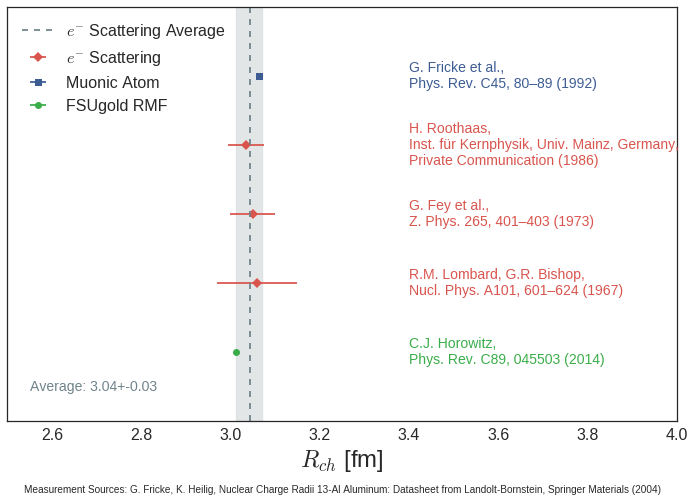

In [8]:
pp.figure(figsize=plot_size)
pp.errorbar(e_scattering_data,
            [1.0, 1.5, 2.0], 
            xerr=e_scattering_data_err, 
            label='$e^{-}$ Scattering', 
            ls='none', 
            marker='D', 
            color=sns.xkcd_rgb['pale red'])
pp.errorbar(muon_atom_data,
            [2.5], 
            xerr=muon_atom_data_err,
            label='Muonic Atom',
            ls='none',
            marker='s',
            color=sns.xkcd_rgb['denim blue'])
pp.errorbar(theory_cal,
            [0.5],
            xerr=theory_cal_err,
            label='FSUgold RMF',
            ls='none',
            marker='o',
            color=sns.xkcd_rgb['medium green'])
pp.plot([ewa,ewa],[0.0,3.0],
        label='$e^{-}$ Scattering Average',
        ls='--',
        color=sns.xkcd_rgb['steel grey'])
pp.fill_between([ewa-ewa_err,ewa+ewa_err],0.0,3.0,
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
pp.text(2.55, 0.25,
        avg_text,
        fontsize=14,
        verticalalignment='center',
        color=sns.xkcd_rgb['steel grey'])
pp.text(3.4, 2.5, 
        'G. Fricke et al.,\nPhys. Rev. C45, 80–89 (1992)',
        fontsize=14,
        verticalalignment='center',
        color=sns.xkcd_rgb['denim blue'])
pp.text(3.4, 2.0,
        'H. Roothaas,\nInst. für Kernphysik, Univ. Mainz, Germany,\nPrivate Communication (1986)',
        fontsize=14,
        verticalalignment='center',
        color=sns.xkcd_rgb['pale red'])
pp.text(3.4, 1.5,
        'G. Fey et al.,\nZ. Phys. 265, 401–403 (1973)',
        fontsize=14,
        verticalalignment='center',
        color=sns.xkcd_rgb['pale red'])
pp.text(3.4, 1.0,
        'R.M. Lombard, G.R. Bishop,\nNucl. Phys. A101, 601–624 (1967)',
        fontsize=14,
        verticalalignment='center',
        color=sns.xkcd_rgb['pale red'])
pp.text(3.4, 0.5,
        'C.J. Horowitz,\nPhys. Rev. C89, 045503 (2014)',
        fontsize=14,
        verticalalignment='center',
        color=sns.xkcd_rgb['medium green'])
pp.text(3.25, -0.5,
        'Measurement Sources: G. Fricke, K. Heilig, Nuclear Charge Radii 13-Al Aluminum: Datasheet from Landolt-Bornstein, Springer Materials (2004)',
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='center')
pp.xlabel('$R_{ch}$ [fm]', fontsize=24)
#pp.ylabel('', fontsize=24)
pp.legend(loc='upper left', fontsize=16)
pp.xticks(fontsize=16)
pp.yticks(y_axis_position,y_axis_labels, fontsize=16)
pp.xlim(2.5,4.0)
pp.ylim(0.0,3.0)
pp.savefig('al_charge_radius_plot.png', bbox_inches='tight')
pp.show()